In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
dtst=pd.read_csv("delivery_time.csv")
dtst

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0, 0.5, 'delivery time')

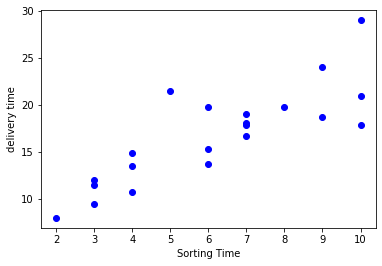

In [13]:
plt.plot(dtst["Sorting Time"], dtst["Delivery Time"], "bo")
plt.xlabel("Sorting Time")
plt.ylabel("delivery time")

In [101]:
dtst.ST.corr(dtst.DT)

0.8259972607955325

In [15]:
dtst.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [81]:
dtst = dtst.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)
dtst

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [82]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = dtst).fit()
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [83]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        15:35:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
pred=model.predict(dtst.ST)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [85]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [86]:
rmse=np.sqrt(np.mean((np.array(dtst["DT"])-np.array(pred))**2))
rmse

2.7916503270617654

Text(0, 0.5, 'Deliver Time')

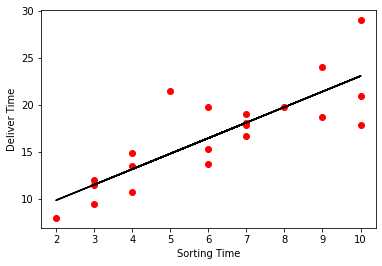

In [92]:
plt.scatter(x=dtst["ST"], y=dtst["DT"],color="red")
plt.plot(dtst.ST, pred, color="black")
plt.xlabel("Sorting Time")
plt.ylabel("Deliver Time")

In [67]:
model2=smf.ols("DT~np.log(ST)", data=dtst).fit() 
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [68]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        15:21:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
pred2=model2.predict(dtst["ST"])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [76]:
model2.resid
rmse2=np.sqrt(np.mean(np.array(dtst["DT"])-np.array(pred2)))
rmse2

3.678878544857309e-08

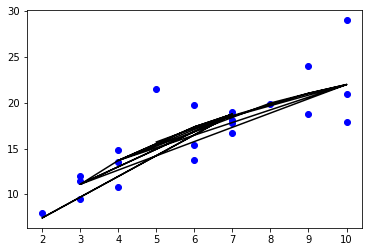

In [93]:
plt.scatter(x=dtst["ST"], y=dtst["DT"], color="blue")
plt.plot(dtst.ST, pred2, color="black")

In [ ]:
#R^2 in model2 is greater than model 1
#RMSE vlaue in model 2 is less compared to model 1
# Hence we can accept model 2 in predicting the values 

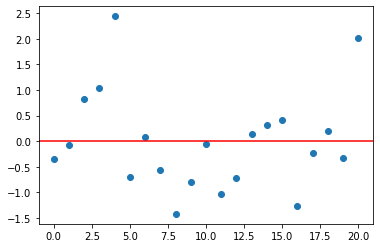

In [112]:
model2.resid_pearson
plt.scatter(np.arange(21),model2.resid_pearson)
plt.axhline(y=0,color='red')
